# Detection of an unknown pulsar and measurement of its period
## Crab Pulsar Experiement Part 3.1

Use this notebook as a template to complate Part 3.1 of the lab script. Use the notebook to annotate your code and document the program. You can print this later and include as part of your lab book.

To begin, start by executing each of the cells in turn to see how the demo program works.

In [127]:
# To begin, we import some libraries that we will need later.

# Some handy standard python libraries
import os

# The numpy library will allow us to do FFTs
import numpy as np

# The pyplot module from matplotlib will allow us to plot things.
from  matplotlib import pyplot as plt

# pi is a useful value!
from math import pi


## Reference manuals

There are many useful python libraries. You may find the following links helpful in programming your code

 * [Numpy FFT module](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html)

 * [Matplotlib manual](https://matplotlib.org/api/pyplot_api.html)

## Getting at the data

There are 5 data files avaliable, each with a different pulsar signal. The sample code below will print the names of the data files to the screen. Each data file has an associated header file which contains useful information about the data. Change the variables "myfile" and "hdrfile" to select which file you want to work on. Remeber that you have to re-run all the following code if you have changed the file. A useful command could be to select "Cell" -> "Run All Below", from the menu.

In [128]:
#(this is explained in https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd).

In [129]:
import os
import numpy as np

pathcrabtemplate = "/Users/alismk/Desktop/3rdYear Courses/Sem2/Lab/LovellObs"

print("Files:", os.listdir(pathcrabtemplate))

datfile = os.path.join(pathcrabtemplate, "psr4.dat")
hdrfile = os.path.join(pathcrabtemplate, "psr4.hdr")

# 1) Read header text (so you can see format info)
with open(hdrfile, "r") as f:
    hdr_text = f.read()
print("\nHEADER CONTENTS:\n")
print(hdr_text)

# 2) Load binary data (TRY int8 first; if wrong, try int16)
data = np.fromfile(datfile, dtype=np.int8)
print("\nLoaded data as int8. Length =", len(data))
print("First 20 samples:", data[:20])

# If it looks wrong, uncomment thi\s to try int16:
# data = np.fromfile(datfile, dtype=np.int16)
# print("\nLoaded data as int16. Length =", len(data))
# print("First 20 samples:", data[:20])

Files: ['.DS_Store', 'psr4.hdr', 'psr4.dat', 'psr5.dat', 'psr5.hdr', 'psr1.hdr', 'psr1.dat', 'psr2', 'psr5', 'psr0.dat', 'psr0.hdr', 'psr2.hdr', 'psr2.dat', 'psr3.dat', 'psr4', 'psr3.hdr', 'psr3', 'psr1', 'psr0']

HEADER CONTENTS:

Date 98/10/02
MJD  51088 
UT   13:40:17.0
Freq1 1422.49997
Tsamp 2.0000000



Loaded data as int8. Length = 106496
First 20 samples: [-2  3  0  0 -4 -1  4  1 -1 -6 -2  3  2  0 -3 -2  4  1 -1 -6]


## Note on the data format

Each dataset is composed of two files, one labeled `.hdr` and one labeled `.dat`.

### The `.hdr` file
This is a plain text (ASCII) format file containing key-value pairs of metadata regarding the observation.

### The `.dat` file
This is 'unformatted' raw binary data. The data are arranged in sequence with 1 byte per sample. Each sample is a single 8-bit signed integer, i.e. taking a value between -128 and +127. The samples are spaced uniformly in time.

Files available: ['.DS_Store', 'psr4.hdr', 'psr4.dat', 'psr5.dat', 'psr5.hdr', 'psr1.hdr', 'psr1.dat', 'psr2', 'psr5', 'psr0.dat', 'psr0.hdr', 'psr2.hdr', 'psr2.dat', 'psr3.dat', 'psr4', 'psr3.hdr', 'psr3', 'psr1', 'psr0']

HEADER:
 Date 98/10/02
MJD  51088 
UT   13:40:17.0
Freq1 1422.49997
Tsamp 2.0000000


N samples = 106496
Total duration T (s) = 212.99200000000002
Frequency resolution df (Hz) = 0.004695012019230769


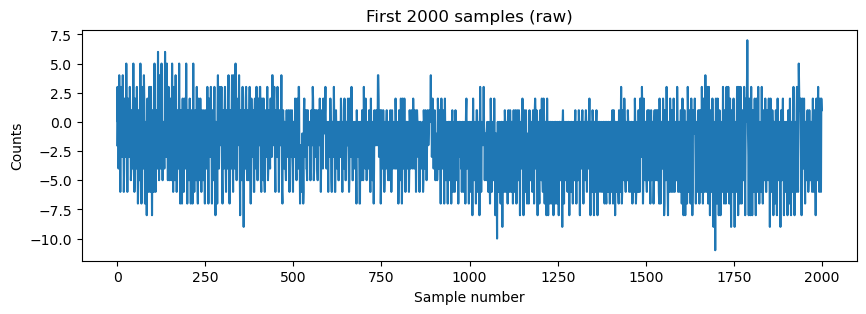

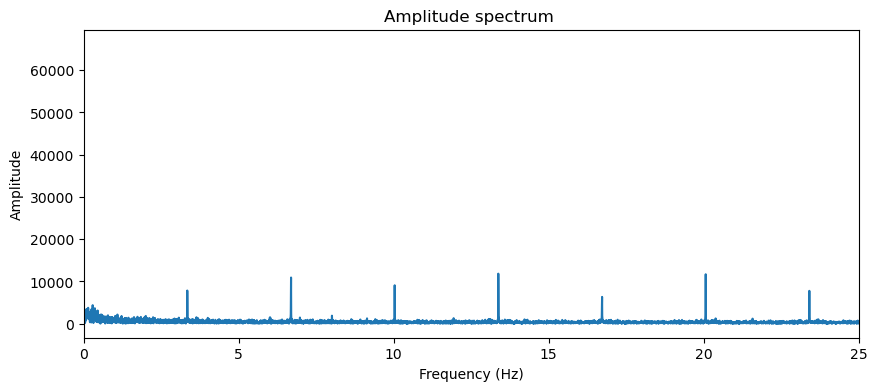

In [130]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Defining the path to the data files...
data_directory = os.path.join(pathcrabtemplate)
print("Files available:", os.listdir(data_directory))

# Select observation
myfile  = "psr4.dat"
hdrfile = "psr4.hdr"

dat_path = os.path.join(data_directory, myfile)
hdr_path = os.path.join(data_directory, hdrfile)

# ---- Read header ----
with open(hdr_path, "r") as f:
    hdr_text = f.read()

print("\nHEADER:\n", hdr_text)

# ---- Tsamp from header  ----

dt = 2 * 1e-3  # seconds


# ---- Load raw time series data ----
data = np.fromfile(dat_path, dtype=np.int8).astype(float)

N = len(data)
T = N * dt
print("N samples =", N)
print("Total duration T (s) =", T)
print("Frequency resolution df (Hz) =", 1 / T)

# ---- Quick time-domain check ----
plt.figure(figsize=(10,3))
plt.plot(data[:2000])
plt.title("First 2000 samples (raw)")
plt.xlabel("Sample number")
plt.ylabel("Counts")
plt.show()

# ---- FFT ----
data = data - np.mean(data)

fft = np.fft.rfft(data)
freq = np.fft.rfftfreq(N, d=dt)

fft[freq < 0.0] = 0      # ignore everything below f Hz
amp = np.abs(fft)


# ---- Spectrum plot ----
plt.figure(figsize=(10,4))
plt.plot(freq[1:], amp[1:])                 
plt.xlim(0, 25)                             
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Amplitude spectrum ")
plt.show()



In [131]:
# ---- Get top peaks ----
mask = (freq > 0.1) & (freq < 25)
f2 = freq[mask]
a2 = amp[mask]

top = np.argsort(a2)[-20:][::-1]

peak_freqs = f2[top[:10]]
peak_amps  = a2[top[:10]]

print("\nTop candidate peaks:")
for f, a in zip(peak_freqs, peak_amps):
    print(f"{f:8.3f} Hz   amp={a:.1f}")


Top candidate peaks:
  13.376 Hz   amp=11843.6
  20.066 Hz   amp=11703.7
   6.690 Hz   amp=10931.1
  10.033 Hz   amp=9094.8
   3.343 Hz   amp=7851.3
  23.409 Hz   amp=7781.6
   6.686 Hz   amp=6360.1
  16.724 Hz   amp=6346.3
  16.719 Hz   amp=5004.2
  13.381 Hz   amp=4614.3


In [132]:
print("\nChecking harmonic relationships:")

tolerance = 0.02   # fractional tolerance (2%) — adjust if needed

for i, f0 in enumerate(peak_freqs):

    harmonics_found = []

    for j, f in enumerate(peak_freqs):

        if i == j:
            continue

        ratio = f / f0
        n = round(ratio)

        # Check if ratio ≈ integer (harmonic)
        if n >= 2 and abs(ratio - n) < tolerance:
            harmonics_found.append((f, n))

    if harmonics_found:
        print(f"\nPossible fundamental: {f0:.3f} Hz")
        for f, n in harmonics_found:
            print(f"   {f:.3f} Hz  ≈ {n} × {f0:.3f}")


Checking harmonic relationships:

Possible fundamental: 6.690 Hz
   13.376 Hz  ≈ 2 × 6.690
   20.066 Hz  ≈ 3 × 6.690
   13.381 Hz  ≈ 2 × 6.690

Possible fundamental: 10.033 Hz
   20.066 Hz  ≈ 2 × 10.033

Possible fundamental: 3.343 Hz
   13.376 Hz  ≈ 4 × 3.343
   20.066 Hz  ≈ 6 × 3.343
   6.690 Hz  ≈ 2 × 3.343
   10.033 Hz  ≈ 3 × 3.343
   23.409 Hz  ≈ 7 × 3.343
   6.686 Hz  ≈ 2 × 3.343
   16.724 Hz  ≈ 5 × 3.343
   16.719 Hz  ≈ 5 × 3.343
   13.381 Hz  ≈ 4 × 3.343

Possible fundamental: 6.686 Hz
   13.376 Hz  ≈ 2 × 6.686
   20.066 Hz  ≈ 3 × 6.686
   13.381 Hz  ≈ 2 × 6.686


In [139]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1) HARMONIC FIT: f_n = n * f0  (through origin)
# ============================================================

def fit_f0_from_arrays(n, f, do_plot=True):
    n = np.asarray(n, dtype=float)
    f = np.asarray(f, dtype=float)

    if len(n) != len(f):
        raise ValueError("n and f must have same length")
    if len(n) < 2:
        raise ValueError("Need at least 2 harmonics")

    # ---- Fit slope through origin ----
    f0 = np.sum(n * f) / np.sum(n**2)

    # residuals
    r = f - n * f0

    # scatter estimate (1 parameter fit -> dof = N-1)
    N = len(n)
    s2 = np.sum(r**2) / (N - 1)
    s = np.sqrt(s2)

    # uncertainty in slope
    f0_unc = np.sqrt(s2 / np.sum(n**2))

    # convert to period + uncertainty propagation
    P = 1.0 / f0
    P_unc = f0_unc / (f0**2)

    print("\n=== Harmonic fit result ===")
    print(f"f0 = {f0:.9f} ± {f0_unc:.9f} Hz")
    print(f"P  = {P:.9f} ± {P_unc:.9f} s")
    print(f"Residual scatter ≈ {s:.6f} Hz")

    if do_plot:
        n_line = np.linspace(0, max(n) * 1.05, 300)

        plt.figure(figsize=(9,5))
        plt.plot(n, f, "o", label="harmonics")
        plt.plot(n_line, f0 * n_line, "-", label="fit")
        plt.xlabel("Harmonic number n")
        plt.ylabel("Frequency (Hz)")
        plt.title("Harmonic linear fit (through origin)")
        plt.legend()
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(9,4))
        plt.axhline(0, linestyle="--")
        plt.plot(n, r, "o")
        plt.xlabel("Harmonic number n")
        plt.ylabel("Residual (Hz)")
        plt.title("Residuals")
        plt.tight_layout()
        plt.show()

    return {
        "f0": f0,
        "f0_unc": f0_unc,
        "P": P,
        "P_unc": P_unc,
        "residuals": r,
        "scatter_Hz": s
    }


# ============================================================
# 2) FOLDING + PULSE WIDTH (FWHM) + WIDTH UNCERTAINTY
# ============================================================

def fold_profile(data, dt, f0_hz, nbins=128):
    P = 1.0 / float(f0_hz)

    t = np.arange(len(data)) * dt
    phase = (t % P) / P

    bins = (phase * nbins).astype(int)
    bins = np.clip(bins, 0, nbins - 1)

    prof = np.bincount(bins, weights=data, minlength=nbins)
    counts = np.bincount(bins, minlength=nbins)
    prof = prof / np.maximum(counts, 1)

    phase_centers = (np.arange(nbins) + 0.5) / nbins
    return phase_centers, prof, P


def _contiguous_width_bins(boolean_mask, peak_i):
    if not boolean_mask[peak_i]:
        return 0

    left = peak_i
    while left > 0 and boolean_mask[left - 1]:
        left -= 1

    right = peak_i
    while right < len(boolean_mask) - 1 and boolean_mask[right + 1]:
        right += 1

    return right - left + 1


def pulse_width_from_profile(phase, prof, P, do_plot=True):
    prof = np.asarray(prof)

    baseline = np.median(prof)
    peak = float(np.max(prof))
    peak_i = int(np.argmax(prof))

    half_level = baseline + 0.5 * (peak - baseline)
    above_half = prof >= half_level

    w_fwhm_bins = _contiguous_width_bins(above_half, peak_i)
    nbins = len(prof)

    W_fwhm_phase = w_fwhm_bins / nbins
    W_fwhm_sec = W_fwhm_phase * P

    # ---- SIMPLE width uncertainty (bin-limited) ----
    # One-bin phase resolution ~ 1/nbins, so timing resolution ~ P/nbins
    # This is a defensible "lab" uncertainty floor.
    W_unc_sec = P / nbins

    if do_plot:
        plt.figure(figsize=(9,4))
        plt.plot(phase, prof, label="Folded profile")
        plt.axhline(baseline, linestyle="--", label="baseline (median)")
        plt.axhline(half_level, linestyle=":", label="half-max level")
        plt.axvline(phase[peak_i], linestyle="--", alpha=0.4, label="peak phase")

        plt.xlabel("Pulse phase (0–1)")
        plt.ylabel("Mean intensity (arb.)")
        plt.title(
            f"Folded profile (P={P:.6f} s)\n"
            f"FWHM={W_fwhm_sec*1e3:.2f} ms ± {W_unc_sec*1e3:.2f} ms (bin-limited)"
        )
        plt.legend()
        plt.tight_layout()
        plt.show()

    return W_fwhm_sec, W_unc_sec, (baseline, peak, half_level)


def estimate_pulse_width(data, dt, f0_hz, nbins=128, do_plot=True):
    data = np.asarray(data, dtype=float)
    data = data - np.mean(data)

    phase, prof, P = fold_profile(data, dt, f0_hz, nbins=nbins)
    W_fwhm_sec, W_unc_sec, levels = pulse_width_from_profile(phase, prof, P, do_plot=do_plot)

    print("\n=== Fold + width result ===")
    print(f"Using f0 = {f0_hz:.9f} Hz  =>  P = {P:.9f} s")
    print(f"Pulse width (FWHM): {W_fwhm_sec:.6e} s  ({W_fwhm_sec*1e3:.3f} ms)")
    print(f"Width uncertainty (bin-limited): ±{W_unc_sec:.6e} s  (±{W_unc_sec*1e3:.3f} ms)")

    return {
        "f0_hz": float(f0_hz),
        "P_sec": float(P),
        "W_fwhm_sec": float(W_fwhm_sec),
        "W_unc_sec": float(W_unc_sec),
        "phase": phase,
        "profile": prof,
        "levels": levels
    }


# ============================================================
# 3) OPTIONAL: combine period-uncertainty into width-uncertainty
# ============================================================

def combine_width_uncertainties(P, P_unc, nbins):
    """
    If you want to include period uncertainty as well (usually tiny),
    combine in quadrature:
      sigma_W^2 = (P/nbins)^2 + (W * P_unc / P)^2
    But we need W to do that; simplest is:
      sigma_W ≈ sqrt((P/nbins)^2 + (P_unc)^2)
    (conservative; bin term usually dominates)
    """
    return np.sqrt((P/nbins)**2 + (P_unc)**2)


=== Harmonic fit result ===
f0 = 3.344309783 ± 0.000161393 Hz
P  = 0.299015362 ± 0.000014430 s
Residual scatter ≈ 0.002189 Hz


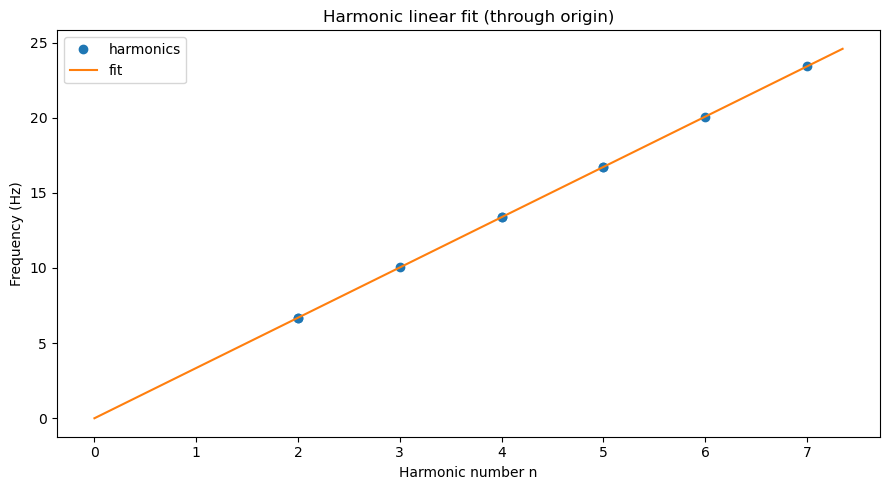

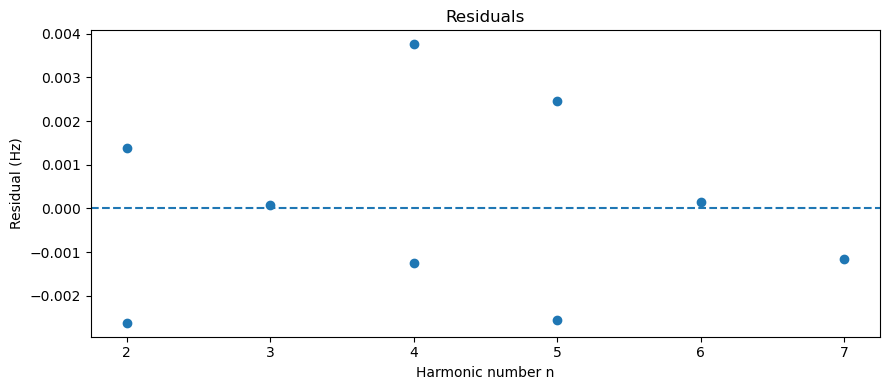

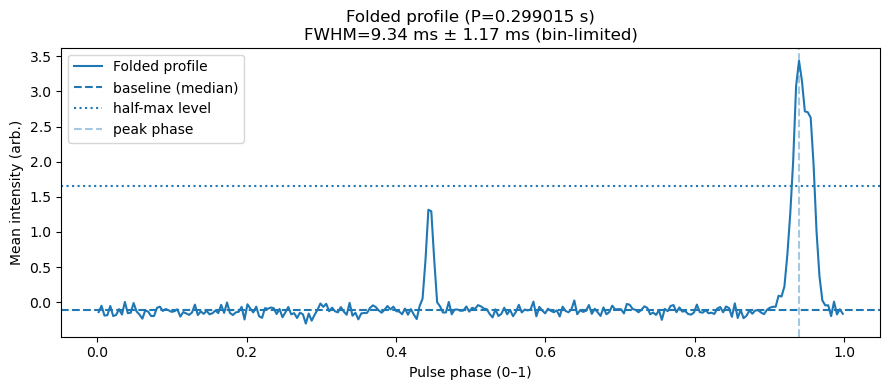


=== Fold + width result ===
Using f0 = 3.344309783 Hz  =>  P = 0.299015362 s
Pulse width (FWHM): 9.344230e-03 s  (9.344 ms)
Width uncertainty (bin-limited): ±1.168029e-03 s  (±1.168 ms)

Width uncertainty (bin + period combined): ±1.168 ms


In [141]:
# ----- PUT YOUR HARMONICS HERE -----
n = np.array([2, 2, 3, 4, 4, 5, 5, 6, 7], dtype=float)

f = np.array([
    6.690,   # 2×
    6.686,   # 2× (duplicate)
    10.033,  # 3×
    13.376,  # 4×
    13.381,  # 4× (duplicate)
    16.724,  # 5×
    16.719,  # 5× (duplicate)
    20.066,  # 6×
    23.409   # 7×
], dtype=float)

# ----- RUN HARMONIC FIT (gives f0 and P) -----
harm = fit_f0_from_arrays(n, f, do_plot=True)

# ----- RUN FOLD + WIDTH (uses fitted f0; you must already have data and dt defined) -----
# data = ...   (your raw time series array)
# dt   = ...   (your sampling time in seconds)

res = estimate_pulse_width(data, dt, f0_hz=harm["f0"], nbins=256, do_plot=True)

# (optional) if you want to include P uncertainty too (usually tiny):
W_unc_combined = combine_width_uncertainties(harm["P"], harm["P_unc"], nbins=256)
print(f"\nWidth uncertainty (bin + period combined): ±{W_unc_combined*1e3:.3f} ms")